In [1]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from itertools import combinations

these_cosupervisees_df = pd.read_csv("these_cosupervisees_df_final.csv")
these_cosupervisees_df = these_cosupervisees_df[these_cosupervisees_df["Discipline_predite"] != "Medecine"]


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
these_cosupervisees_df.shape

(63836, 37)

Création d'une matrice d'adjacence pour compter les liens entre disciplines

In [3]:
unique_discipline = these_cosupervisees_df["Discipline_predite"].dropna().unique()
couple = (len(unique_discipline),len(unique_discipline))
data = np.zeros(couple, dtype=int)
df = pd.DataFrame(data, columns=unique_discipline, index=unique_discipline) 
df.head(20)

,"Materiaux, Milieux et Chimie",Droit et Science Politique,Biologie,Langues et Litteratures,Economie Gestion,SHS,Psychologie,Informatique,Science de l'ingenieur,Mathematiques,Science de la Terre,Sciences de l'education
"Materiaux, Milieux et Chimie",0,0,0,0,0,0,0,0,0,0,0,0
Droit et Science Politique,0,0,0,0,0,0,0,0,0,0,0,0
Biologie,0,0,0,0,0,0,0,0,0,0,0,0
Langues et Litteratures,0,0,0,0,0,0,0,0,0,0,0,0
Economie Gestion,0,0,0,0,0,0,0,0,0,0,0,0
SHS,0,0,0,0,0,0,0,0,0,0,0,0
Psychologie,0,0,0,0,0,0,0,0,0,0,0,0
Informatique,0,0,0,0,0,0,0,0,0,0,0,0
Science de l'ingenieur,0,0,0,0,0,0,0,0,0,0,0,0
Mathematiques,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
from itertools import combinations

def create_couples(my_list, excluded_value="Medecine"):
    non_nan_values = [element for element in my_list if not pd.isna(element) and element != excluded_value]
    all_couples = list(combinations(non_nan_values, 2))
    couple_array = np.array(all_couples)
    return couple_array


def add_to_df(couple_array):
    for couple in couple_array:
            df[couple[0]][couple[1]] += 1
            df[couple[1]][couple[0]] += 1

couples_arrays = these_cosupervisees_df[["DomMaj.1", "DomMaj.2", "DomMaj.3", "DomMaj.4"]].apply(lambda x: create_couples(x, excluded_value="Medecine"), axis=1)
couples_arrays.apply(lambda x: add_to_df(x))

df.head(20)

,"Materiaux, Milieux et Chimie",Droit et Science Politique,Biologie,Langues et Litteratures,Economie Gestion,SHS,Psychologie,Informatique,Science de l'ingenieur,Mathematiques,Science de la Terre,Sciences de l'education
"Materiaux, Milieux et Chimie",30918,40,1760,71,43,182,18,308,2442,198,389,1
Droit et Science Politique,40,4396,149,22,49,244,5,15,13,6,9,0
Biologie,1760,149,31484,478,154,1170,264,421,877,220,617,35
Langues et Litteratures,71,22,478,5036,3,395,26,52,27,6,5,57
Economie Gestion,43,49,154,3,5598,170,9,28,41,61,16,1
SHS,182,244,1170,395,170,12864,71,114,120,24,131,14
Psychologie,18,5,264,26,9,71,2252,30,22,3,4,2
Informatique,308,15,421,52,28,114,30,8892,519,218,27,1
Science de l'ingenieur,2442,13,877,27,41,120,22,519,15098,216,129,3
Mathematiques,198,6,220,6,61,24,3,218,216,3732,32,3


In [5]:
num_rows, num_cols = df.shape

for i in range(min(num_rows, num_cols)):
    df.iat[i, i] /= 2
    
df.head(30)

,"Materiaux, Milieux et Chimie",Droit et Science Politique,Biologie,Langues et Litteratures,Economie Gestion,SHS,Psychologie,Informatique,Science de l'ingenieur,Mathematiques,Science de la Terre,Sciences de l'education
"Materiaux, Milieux et Chimie",15459,40,1760,71,43,182,18,308,2442,198,389,1
Droit et Science Politique,40,2198,149,22,49,244,5,15,13,6,9,0
Biologie,1760,149,15742,478,154,1170,264,421,877,220,617,35
Langues et Litteratures,71,22,478,2518,3,395,26,52,27,6,5,57
Economie Gestion,43,49,154,3,2799,170,9,28,41,61,16,1
SHS,182,244,1170,395,170,6432,71,114,120,24,131,14
Psychologie,18,5,264,26,9,71,1126,30,22,3,4,2
Informatique,308,15,421,52,28,114,30,4446,519,218,27,1
Science de l'ingenieur,2442,13,877,27,41,120,22,519,7549,216,129,3
Mathematiques,198,6,220,6,61,24,3,218,216,1866,32,3


In [6]:
num_rows, num_cols = df.shape

for i in range(min(num_rows, num_cols)):
    df.iat[i, i] = 0
df = df.astype(int)
    
df.head(30)

,"Materiaux, Milieux et Chimie",Droit et Science Politique,Biologie,Langues et Litteratures,Economie Gestion,SHS,Psychologie,Informatique,Science de l'ingenieur,Mathematiques,Science de la Terre,Sciences de l'education
"Materiaux, Milieux et Chimie",0,40,1760,71,43,182,18,308,2442,198,389,1
Droit et Science Politique,40,0,149,22,49,244,5,15,13,6,9,0
Biologie,1760,149,0,478,154,1170,264,421,877,220,617,35
Langues et Litteratures,71,22,478,0,3,395,26,52,27,6,5,57
Economie Gestion,43,49,154,3,0,170,9,28,41,61,16,1
SHS,182,244,1170,395,170,0,71,114,120,24,131,14
Psychologie,18,5,264,26,9,71,0,30,22,3,4,2
Informatique,308,15,421,52,28,114,30,0,519,218,27,1
Science de l'ingenieur,2442,13,877,27,41,120,22,519,0,216,129,3
Mathematiques,198,6,220,6,61,24,3,218,216,0,32,3


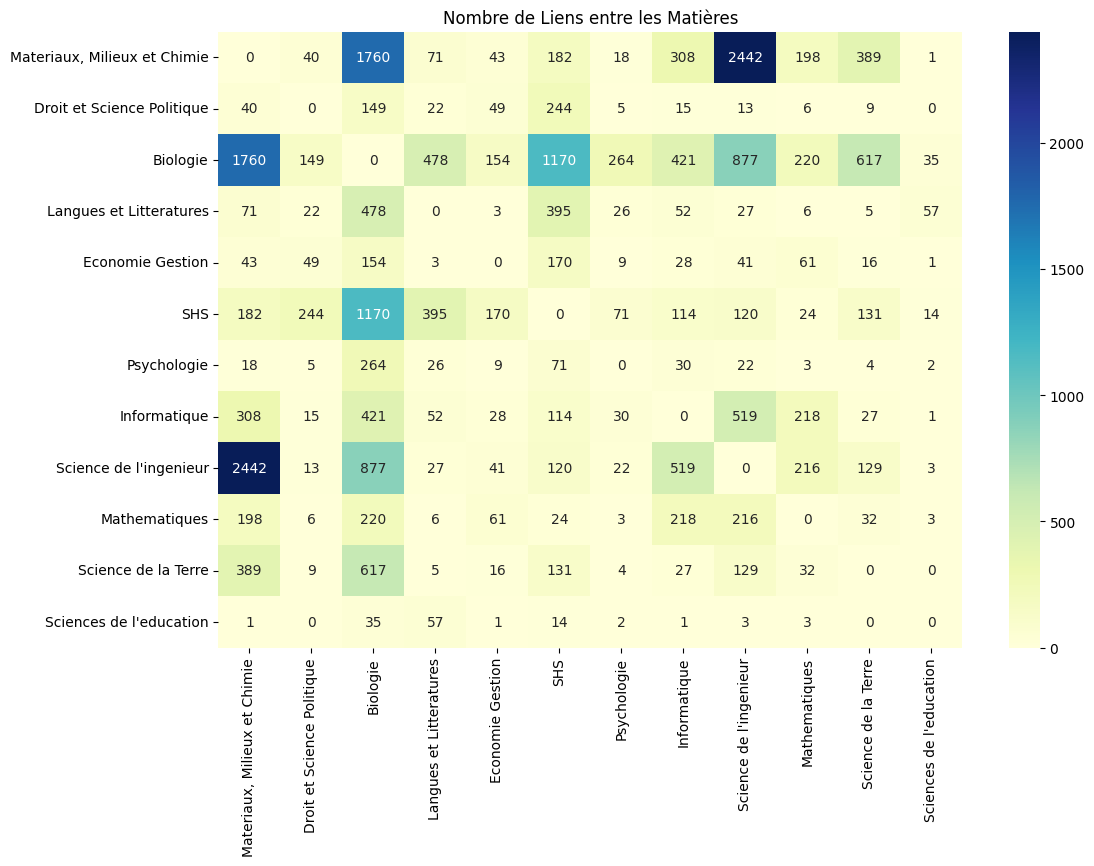

In [7]:
import seaborn as sns
# Créer le heatmap
plt.figure(figsize=(12, 8))
ax = sns.heatmap(df, annot=True, cmap="YlGnBu", fmt="d", xticklabels=True, yticklabels=True)
plt.title("Nombre de Liens entre les Matières")
ax.figure.savefig('hmxFinal.png', transparent=False, bbox_inches='tight')

plt.show()

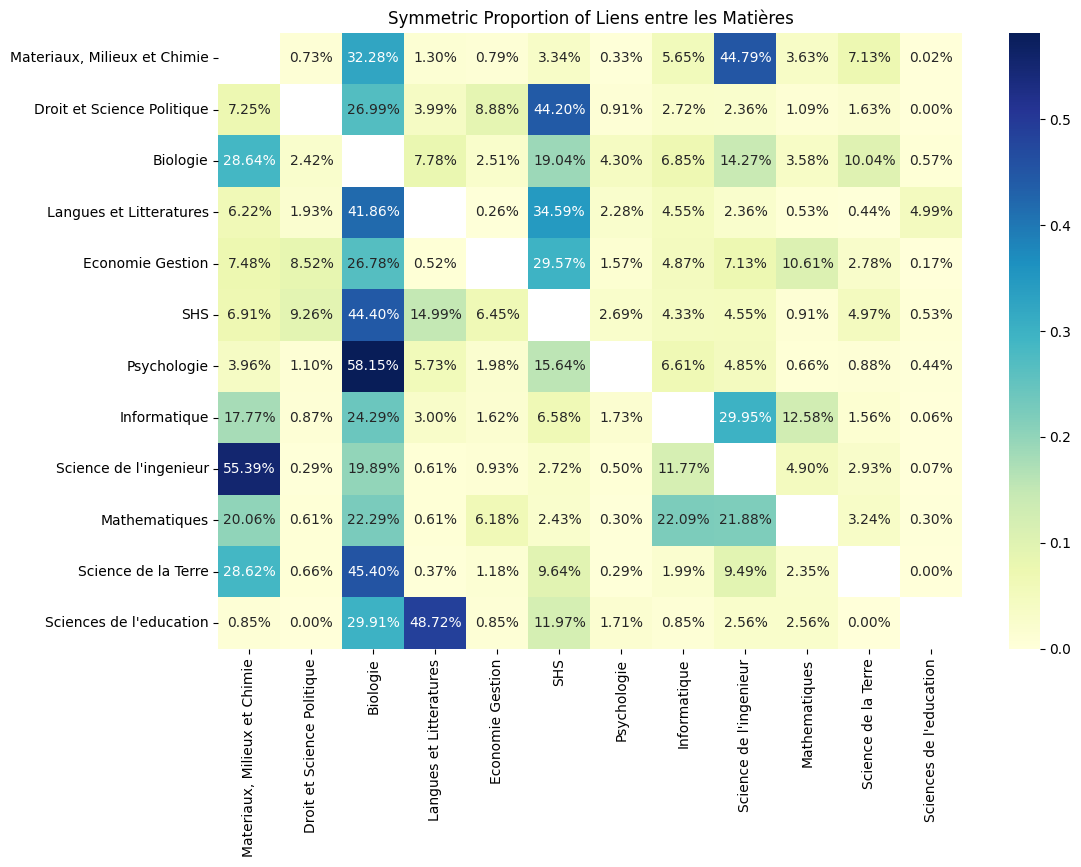

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Normalize the values to get proportions line by line while maintaining symmetry
df_normalized = df.div(df.sum(axis=1), axis=0)

# Set the values on the main diagonal to NaN for visualization purposes
np.fill_diagonal(df_normalized.values, np.nan)

# Create the heatmap without any space between rows
plt.figure(figsize=(12, 8))
ax = sns.heatmap(df_normalized, annot=True, cmap="YlGnBu", fmt=".2%", xticklabels=True, yticklabels=True, mask=np.isnan(df_normalized), linewidths=0, linecolor='white')
plt.title("Symmetric Proportion of Liens entre les Matières")

# Save the heatmap
plt.savefig('symmetric_row_normalized_heatmap.png', transparent=False, bbox_inches='tight')

# Show the plot
plt.show()


In [9]:
unique_discipline = these_cosupervisees_df["Discipline_predite"].dropna().unique()
couple = (len(unique_discipline),len(unique_discipline))
data = np.zeros(couple, dtype=int)
df_2 = pd.DataFrame(data, columns=unique_discipline, index=unique_discipline) 
df_2.head(20)

,"Materiaux, Milieux et Chimie",Droit et Science Politique,Biologie,Langues et Litteratures,Economie Gestion,SHS,Psychologie,Informatique,Science de l'ingenieur,Mathematiques,Science de la Terre,Sciences de l'education
"Materiaux, Milieux et Chimie",0,0,0,0,0,0,0,0,0,0,0,0
Droit et Science Politique,0,0,0,0,0,0,0,0,0,0,0,0
Biologie,0,0,0,0,0,0,0,0,0,0,0,0
Langues et Litteratures,0,0,0,0,0,0,0,0,0,0,0,0
Economie Gestion,0,0,0,0,0,0,0,0,0,0,0,0
SHS,0,0,0,0,0,0,0,0,0,0,0,0
Psychologie,0,0,0,0,0,0,0,0,0,0,0,0
Informatique,0,0,0,0,0,0,0,0,0,0,0,0
Science de l'ingenieur,0,0,0,0,0,0,0,0,0,0,0,0
Mathematiques,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from itertools import combinations


# Create categories
categorie_1 = ['Biologie', 'Psychologie', 'Science de la Terre']
categorie_2 = ['Materiaux, Milieux et Chimie', "Science de l'ingenieur", 'Informatique', 'Mathematiques']
categorie_3 = ['SHS', 'Droit et Science Politique', 'Economie Gestion', "Sciences de l'education", 'Langues et Litteratures']

categories = [categorie_1, categorie_2, categorie_3]

# Assuming these_cosupervisees_df is your DataFrame containing discipline information
# Replace these_cosupervisees_df with your actual DataFrame

def create_couples(my_list, excluded_value=np.nan):
    non_nan_values = [element for element in my_list if not pd.isna(element) and element != excluded_value]
    all_couples = list(combinations(non_nan_values, 2))
    couple_array = np.array(all_couples)
    return couple_array

def add_to_df(couple_array, categories):
    for couple in couple_array:
        category1 = next((cat for cat in categories if couple[0] in cat), None)
        category2 = next((cat for cat in categories if couple[1] in cat), None)
        if category1 is not None and category2 is not None and category1 != category2:
            df_2[couple[0]][couple[1]] += 1
            df_2[couple[1]][couple[0]] += 1

# Apply the functions to create couples and update the DataFrame
couples_arrays = these_cosupervisees_df.apply(lambda x: create_couples(x, excluded_value=np.nan), axis=1)
couples_arrays.apply(lambda x: add_to_df(x, categories))

# Display the updated DataFrame
df_2.head(20)

,"Materiaux, Milieux et Chimie",Droit et Science Politique,Biologie,Langues et Litteratures,Economie Gestion,SHS,Psychologie,Informatique,Science de l'ingenieur,Mathematiques,Science de la Terre,Sciences de l'education
"Materiaux, Milieux et Chimie",0,78,3787,139,95,376,46,0,0,0,902,7
Droit et Science Politique,78,0,306,0,0,0,14,35,27,12,19,0
Biologie,3787,306,0,1033,319,2586,0,996,1799,533,0,1825
Langues et Litteratures,139,0,1033,0,0,0,67,117,55,16,10,0
Economie Gestion,95,0,319,0,0,0,22,61,96,140,31,0
SHS,376,0,2586,0,0,0,174,262,265,48,281,0
Psychologie,46,14,0,67,22,174,0,75,58,9,0,17
Informatique,0,35,996,117,61,262,75,0,0,0,59,2
Science de l'ingenieur,0,27,1799,55,96,265,58,0,0,0,284,6
Mathematiques,0,12,533,16,140,48,9,0,0,0,62,11


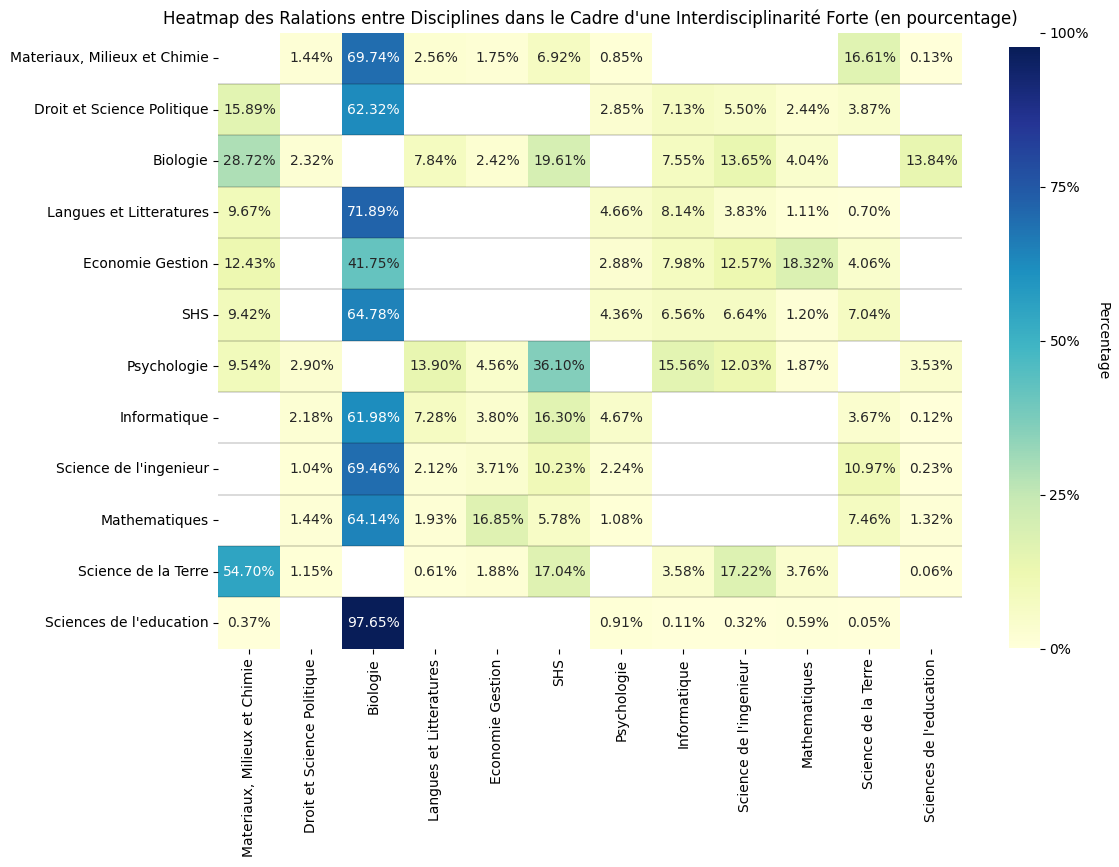

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Replace 0% and NaN values with white
df_2.replace({0: np.nan, np.nan: np.nan}, inplace=True)

# Normalize the values to get proportions line by line while maintaining symmetry
df_normalized_2 = df_2.div(df_2.sum(axis=1), axis=0)

# Set the values on the main diagonal to NaN for visualization purposes
np.fill_diagonal(df_normalized_2.values, np.nan)

# Create the heatmap without any space between rows
plt.figure(figsize=(12, 8))
ax = sns.heatmap(df_normalized_2, annot=True, cmap="YlGnBu", fmt=".2%", xticklabels=True, yticklabels=True, mask=np.isnan(df_normalized_2), linewidths=0, linecolor='white')
ax.hlines([1,2,3,4,5,6,7,8,9,10,11], *ax.get_xlim(), color='black', linewidths=0.2)


# Customize colorbar to make percentage values smaller
cbar = ax.collections[0].colorbar
cbar.set_ticks([0, 0.25, 0.5, 0.75, 1.0])  # Adjust these ticks as needed
cbar.set_ticklabels(['0%', '25%', '50%', '75%', '100%'])
cbar.set_label('Percentage', rotation=270, labelpad=15)

plt.title("Heatmap des Ralations entre Disciplines dans le Cadre d'une Interdisciplinarité Forte (en pourcentage)")

# Save the heatmap
plt.savefig('symmetric_row_normalized_heatmapFinal.png', transparent=False, bbox_inches='tight')

# Show the plot
plt.show()


In [12]:
import pandas as pd
import numpy as np
from itertools import combinations

# Assuming these_cosupervisees_df is defined

# Assuming these_cosupervisees_df is defined

# Filter the data for the specified time periods
df_1990_2005 = these_cosupervisees_df[(these_cosupervisees_df['Year'] >= 1990) & (these_cosupervisees_df['Year'] <= 2005)]
df_2005_2018 = these_cosupervisees_df[(these_cosupervisees_df['Year'] > 2005) & (these_cosupervisees_df['Year'] <= 2018)]

# Create unique discipline set without NaN values
unique_disciplines = set(these_cosupervisees_df[["DomMaj.1", "DomMaj.2", "DomMaj.3", "DomMaj.4"]].values.flatten())
disciplines_to_exclude = ["Medecine", "Biologie", "Sciences de l'education"]
unique_disciplines = [discipline for discipline in unique_disciplines if discipline not in disciplines_to_exclude and not pd.isna(discipline)]

# Initialize adjacency matrices
adj_1990_2005 = pd.DataFrame(0, columns=unique_disciplines, index=unique_disciplines)
adj_2005_2018 = pd.DataFrame(0, columns=unique_disciplines, index=unique_disciplines)

# Rest of your code...


def create_couples(my_list, excluded_values=["Medecine", "Biologie", "Sciences de l'education"]):
    non_excluded_values = [element for element in my_list if not pd.isna(element) and element not in excluded_values]
    all_couples = list(combinations(non_excluded_values, 2))
    return all_couples

def update_adjacency_matrix(couple_array, adj_df):
    for couple in couple_array:
        adj_df.loc[couple[0], couple[1]] += 1
        adj_df.loc[couple[1], couple[0]] += 1

# Apply the function to create couples and update adjacency matrices for 1990-2005
couples_1990_2005 = df_1990_2005[["DomMaj.1", "DomMaj.2", "DomMaj.3", "DomMaj.4"]].apply(lambda x: create_couples(x), axis=1)
couples_1990_2005.apply(lambda x: update_adjacency_matrix(x, adj_1990_2005))

# Apply the function to create couples and update adjacency matrices for 2005-2018
couples_2005_2018 = df_2005_2018[["DomMaj.1", "DomMaj.2", "DomMaj.3", "DomMaj.4"]].apply(lambda x: create_couples(x), axis=1)
couples_2005_2018.apply(lambda x: update_adjacency_matrix(x, adj_2005_2018))

# Display the adjacency matrices
print("Adjacency Matrix for 1990-2005:")
print(adj_1990_2005)

print("\nAdjacency Matrix for 2005-2018:")
print(adj_2005_2018)


Adjacency Matrix for 1990-2005:
                              SHS  Droit et Science Politique  \
SHS                           684                          14   
Droit et Science Politique     14                         258   
Materiaux, Milieux et Chimie    9                           5   
Mathematiques                   1                           0   
Economie Gestion                7                           5   
Psychologie                     4                           0   
Langues et Litteratures        31                           0   
Science de l'ingenieur          5                           1   
Informatique                    3                           0   
Science de la Terre            11                           2   

                              Materiaux, Milieux et Chimie  Mathematiques  \
SHS                                                      9              1   
Droit et Science Politique                               5              0   
Materiaux, Milieux et

In [13]:
num_rows, num_cols = adj_1990_2005.shape

for i in range(min(num_rows, num_cols)):
    adj_1990_2005.iat[i, i] = 0
adj_1990_2005 = adj_1990_2005.astype(int)

adj_1990_2005.head(20)

,SHS,Droit et Science Politique,"Materiaux, Milieux et Chimie",Mathematiques,Economie Gestion,Psychologie,Langues et Litteratures,Science de l'ingenieur,Informatique,Science de la Terre
SHS,0,14,9,1,7,4,31,5,3,11
Droit et Science Politique,14,0,5,0,5,0,0,1,0,2
"Materiaux, Milieux et Chimie",9,5,0,18,1,5,9,141,18,42
Mathematiques,1,0,18,0,5,0,0,15,8,4
Economie Gestion,7,5,1,5,0,0,1,4,2,3
Psychologie,4,0,5,0,0,0,2,0,0,1
Langues et Litteratures,31,0,9,0,1,2,0,2,6,0
Science de l'ingenieur,5,1,141,15,4,0,2,0,16,10
Informatique,3,0,18,8,2,0,6,16,0,4
Science de la Terre,11,2,42,4,3,1,0,10,4,0


In [14]:
num_rows, num_cols = adj_2005_2018.shape

for i in range(min(num_rows, num_cols)):
    adj_2005_2018.iat[i, i] = 0
adj_2005_2018 = adj_2005_2018.astype(int)
adj_2005_2018.head(20)

,SHS,Droit et Science Politique,"Materiaux, Milieux et Chimie",Mathematiques,Economie Gestion,Psychologie,Langues et Litteratures,Science de l'ingenieur,Informatique,Science de la Terre
SHS,0,123,115,20,109,38,224,85,81,99
Droit et Science Politique,123,0,28,4,22,2,11,8,9,6
"Materiaux, Milieux et Chimie",115,28,0,150,31,7,54,1844,229,300
Mathematiques,20,4,150,0,43,3,4,166,170,20
Economie Gestion,109,22,31,43,0,4,1,31,21,9
Psychologie,38,2,7,3,4,0,17,13,21,3
Langues et Litteratures,224,11,54,4,1,17,0,19,32,5
Science de l'ingenieur,85,8,1844,166,31,13,19,0,395,97
Informatique,81,9,229,170,21,21,32,395,0,17
Science de la Terre,99,6,300,20,9,3,5,97,17,0


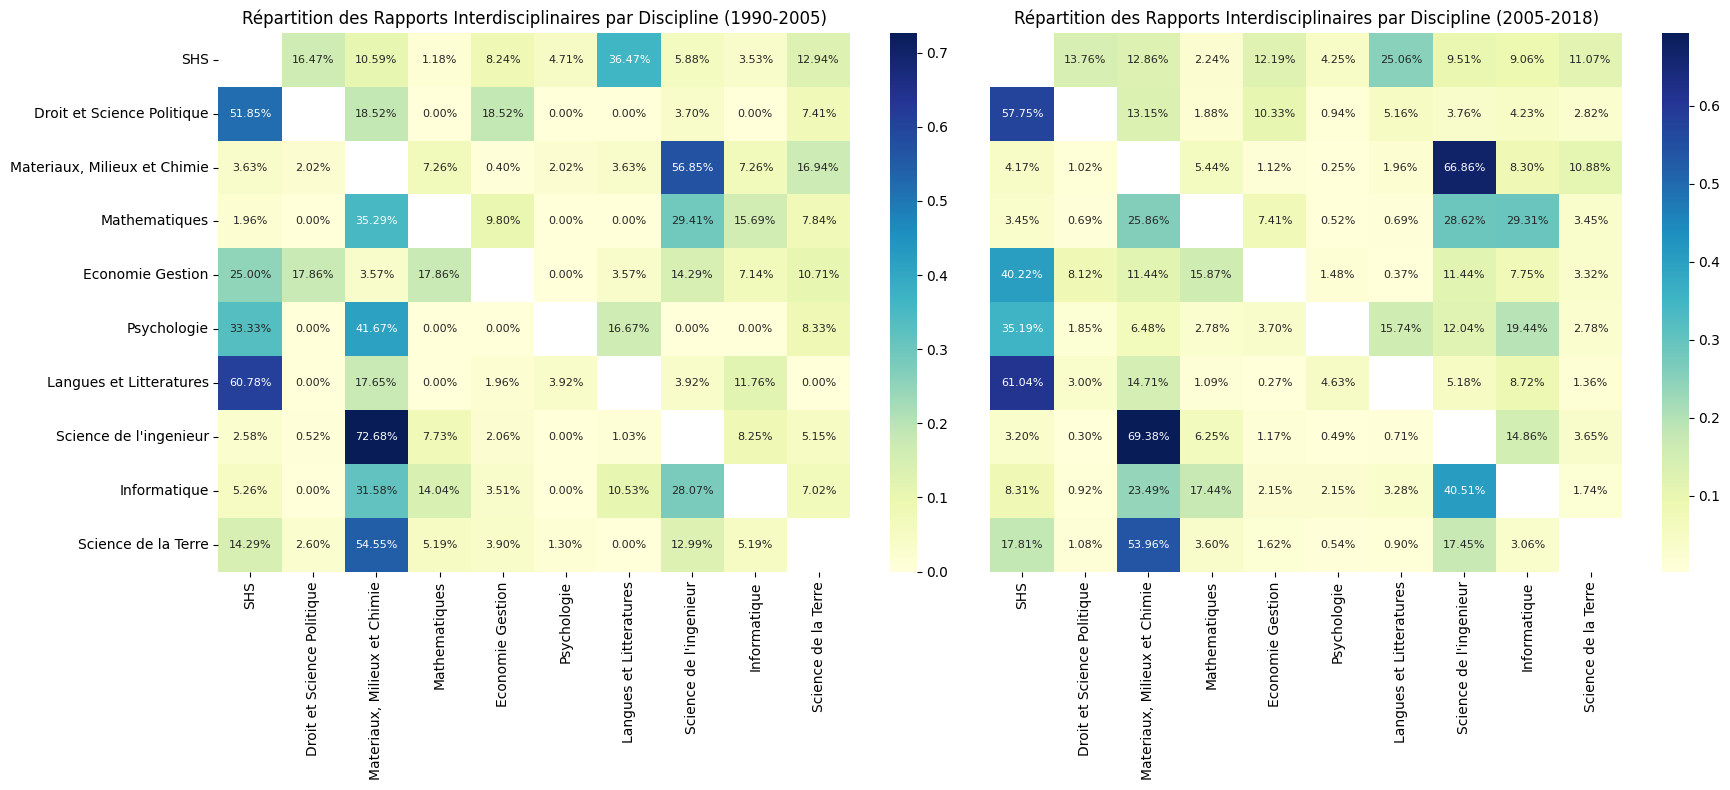

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming adj_1990_2005 and adj_2005_2018 are defined

# Normalize the values to get proportions line by line while maintaining symmetry
adj_1990_2005_normalized = adj_1990_2005.div(adj_1990_2005.sum(axis=1), axis=0)
adj_2005_2018_normalized = adj_2005_2018.div(adj_2005_2018.sum(axis=1), axis=0)

# Set the values on the main diagonal to NaN for visualization purposes
np.fill_diagonal(adj_1990_2005_normalized.values, np.nan)
np.fill_diagonal(adj_2005_2018_normalized.values, np.nan)

# Create a combined plot with subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Plot for 1990-2005
sns.heatmap(adj_1990_2005_normalized, annot=True, cmap="YlGnBu", fmt=".2%", xticklabels=True, yticklabels=True, mask=np.isnan(adj_1990_2005_normalized), linewidths=0, linecolor='white', ax=axes[0], annot_kws={"size": 8})
axes[0].set_title("Répartition des Rapports Interdisciplinaires par Discipline (1990-2005)")

# Plot for 2005-2018
sns.heatmap(adj_2005_2018_normalized, annot=True, cmap="YlGnBu", fmt=".2%", xticklabels=True, yticklabels=False, mask=np.isnan(adj_2005_2018_normalized), linewidths=0, linecolor='white', ax=axes[1], annot_kws={"size": 8})
axes[1].set_title("Répartition des Rapports Interdisciplinaires par Discipline (2005-2018)")

# Adjust layout
plt.tight_layout()

# Save the combined plot
plt.savefig('combined_heatmaps.png', transparent=False, bbox_inches='tight')

# Show the plot
plt.show()


In [16]:
# Assuming these_cosupervisees_df is defined

# Filter the data for the specified time periods
df_1990_2005 = these_cosupervisees_df[(these_cosupervisees_df['Year'] >= 1990) & (these_cosupervisees_df['Year'] <= 2005)]
df_2005_2018 = these_cosupervisees_df[(these_cosupervisees_df['Year'] > 2005) & (these_cosupervisees_df['Year'] <= 2018)]

# Create unique discipline set without NaN values
unique_disciplines = set(these_cosupervisees_df[["DomMaj.1", "DomMaj.2", "DomMaj.3", "DomMaj.4"]].values.flatten())
disciplines_to_exclude = ["Medecine", "Biologie", "Sciences de l'education"]
unique_disciplines = [discipline for discipline in unique_disciplines if discipline not in disciplines_to_exclude and not pd.isna(discipline)]

# Initialize adjacency matrices
adj_1990_2005 = pd.DataFrame(0, columns=unique_disciplines, index=unique_disciplines)
adj_2005_2018 = pd.DataFrame(0, columns=unique_disciplines, index=unique_disciplines)

# Rest of your code...

# Define categories list
categories = [categorie_1, categorie_2, categorie_3]

def create_couples(my_list, categories):
    non_nan_values = [element for element in my_list if not pd.isna(element)]
    all_couples = list(combinations(non_nan_values, 2))
    
    filtered_couples = [(item1, item2) for item1, item2 in all_couples
                        if not any(item1 in cat and item2 in cat for cat in categories)]
    
    return filtered_couples

def update_adjacency_matrix(couple_array, adj_df):
    for couple in couple_array:
        if couple[0] in adj_df.index and couple[1] in adj_df.columns:
            adj_df.loc[couple[0], couple[1]] += 1
            adj_df.loc[couple[1], couple[0]] += 1

# Apply the function to create couples and update adjacency matrices for 1990-2005
couples_1990_2005 = df_1990_2005[["DomMaj.1", "DomMaj.2", "DomMaj.3", "DomMaj.4"]].apply(lambda x: create_couples(x, categories), axis=1)
couples_1990_2005.apply(lambda x: update_adjacency_matrix(x, adj_1990_2005))

# Apply the function to create couples and update adjacency matrices for 2005-2018
couples_2005_2018 = df_2005_2018[["DomMaj.1", "DomMaj.2", "DomMaj.3", "DomMaj.4"]].apply(lambda x: create_couples(x, categories), axis=1)
couples_2005_2018.apply(lambda x: update_adjacency_matrix(x, adj_2005_2018))

num_rows, num_cols = adj_1990_2005.shape

for i in range(min(num_rows, num_cols)):
    adj_1990_2005.iat[i, i] = 0
adj_1990_2005 = adj_1990_2005.astype(int)

num_rows, num_cols = adj_2005_2018.shape

for i in range(min(num_rows, num_cols)):
    adj_2005_2018.iat[i, i] = 0
adj_2005_2018 = adj_2005_2018.astype(int)


In [17]:
adj_1990_2005.head(20)

,SHS,Droit et Science Politique,"Materiaux, Milieux et Chimie",Mathematiques,Economie Gestion,Psychologie,Langues et Litteratures,Science de l'ingenieur,Informatique,Science de la Terre
SHS,0,0,9,1,0,4,0,5,3,11
Droit et Science Politique,0,0,5,0,0,0,0,1,0,2
"Materiaux, Milieux et Chimie",9,5,0,0,1,5,9,0,0,42
Mathematiques,1,0,0,0,5,0,0,0,0,4
Economie Gestion,0,0,1,5,0,0,0,4,2,3
Psychologie,4,0,5,0,0,0,2,0,0,0
Langues et Litteratures,0,0,9,0,0,2,0,2,6,0
Science de l'ingenieur,5,1,0,0,4,0,2,0,0,10
Informatique,3,0,0,0,2,0,6,0,0,4
Science de la Terre,11,2,42,4,3,0,0,10,4,0


In [18]:
adj_2005_2018.head(20)

,SHS,Droit et Science Politique,"Materiaux, Milieux et Chimie",Mathematiques,Economie Gestion,Psychologie,Langues et Litteratures,Science de l'ingenieur,Informatique,Science de la Terre
SHS,0,0,115,20,0,38,0,85,81,99
Droit et Science Politique,0,0,28,4,0,2,0,8,9,6
"Materiaux, Milieux et Chimie",115,28,0,0,31,7,54,0,0,300
Mathematiques,20,4,0,0,43,3,4,0,0,20
Economie Gestion,0,0,31,43,0,4,0,31,21,9
Psychologie,38,2,7,3,4,0,17,13,21,0
Langues et Litteratures,0,0,54,4,0,17,0,19,32,5
Science de l'ingenieur,85,8,0,0,31,13,19,0,0,97
Informatique,81,9,0,0,21,21,32,0,0,17
Science de la Terre,99,6,300,20,9,0,5,97,17,0


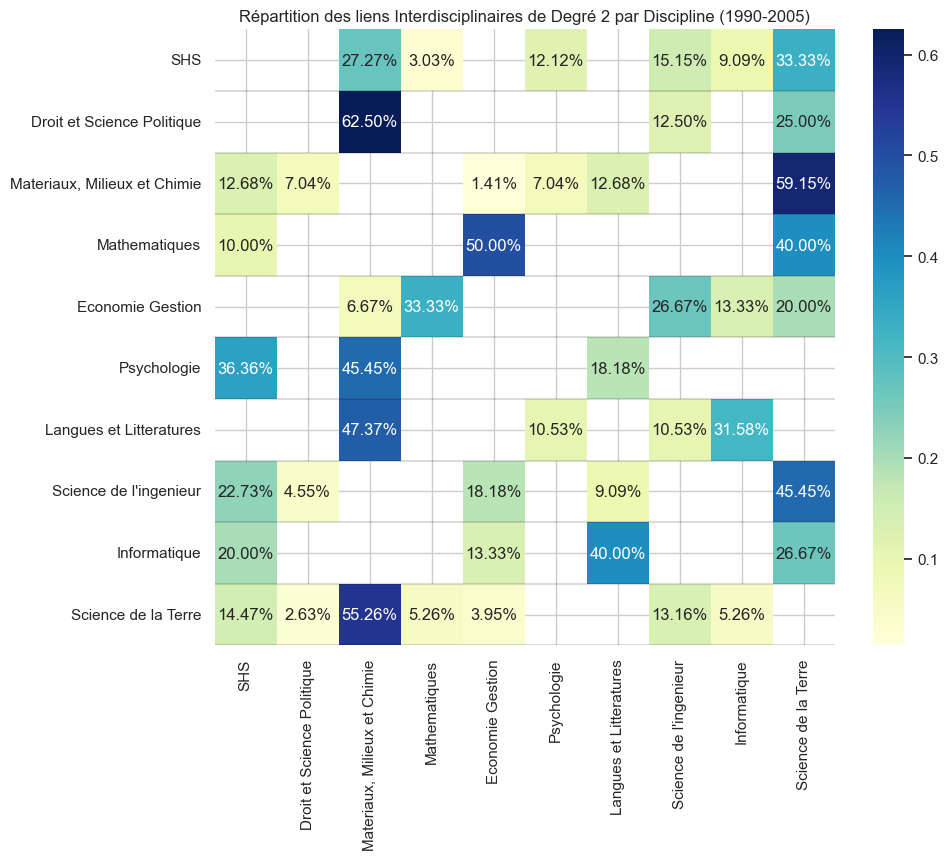

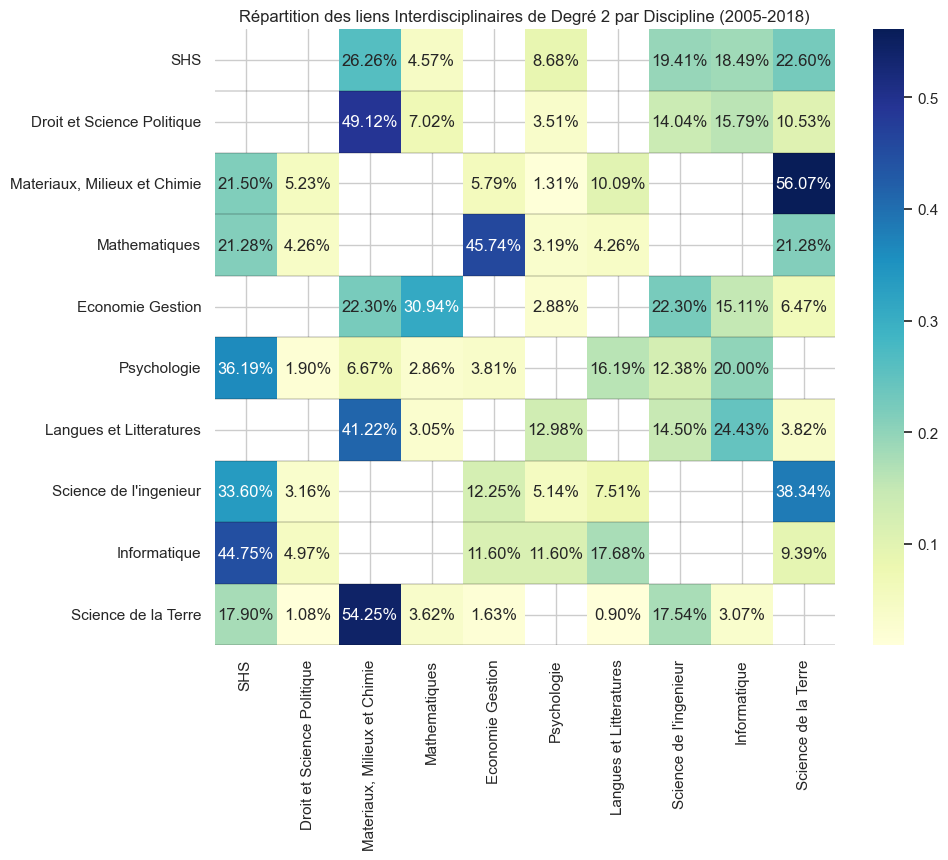

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming adj_1990_2005 and adj_2005_2018 are defined
adj_1990_2005.replace({0: np.nan, np.nan: np.nan}, inplace=True)
adj_2005_2018.replace({0: np.nan, np.nan: np.nan}, inplace=True)

# Normalize the values to get proportions line by line while maintaining symmetry
adj_1990_2005_normalized = adj_1990_2005.div(adj_1990_2005.sum(axis=1), axis=0)
adj_2005_2018_normalized = adj_2005_2018.div(adj_2005_2018.sum(axis=1), axis=0)

# Set the values on the main diagonal to NaN for visualization purposes
np.fill_diagonal(adj_1990_2005_normalized.values, np.nan)
np.fill_diagonal(adj_2005_2018_normalized.values, np.nan)

# Plot for 1990-2005
plt.figure(figsize=(10, 8))
sns.heatmap(adj_1990_2005_normalized, annot=True, cmap="YlGnBu", fmt=".2%", xticklabels=True, yticklabels=True, mask=np.isnan(adj_1990_2005_normalized), linewidths=0, linecolor='white')
plt.hlines([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], *plt.xlim(), color='black', linewidths=0.2)
plt.title("Répartition des liens Interdisciplinaires de Degré 2 par Discipline (1990-2005)")
plt.savefig('heatmap_1990_2005.png', transparent=False, bbox_inches='tight')
plt.show()

# Plot for 2005-2018
plt.figure(figsize=(10, 8))
sns.heatmap(adj_2005_2018_normalized, annot=True, cmap="YlGnBu", fmt=".2%", xticklabels=True, yticklabels=True, mask=np.isnan(adj_2005_2018_normalized), linewidths=0, linecolor='white')
plt.hlines([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], *plt.xlim(), color='black', linewidths=0.2)
plt.title("Répartition des liens Interdisciplinaires de Degré 2 par Discipline (2005-2018)")
plt.savefig('heatmap_2005_2018.png', transparent=False, bbox_inches='tight')
plt.show()


On remarque dans la heatmap ci-dessus de nombreux liens avec Biologie ce qui laisse penser à une erreur

In [46]:
excluded_value = "Medecine"
def create_couples(my_list,excluded_value):
    non_nan_values = [element for element in my_list if not pd.isna(element) and element != excluded_value]
    all_couples = list(combinations(non_nan_values, 2))
    couple_array = np.array(all_couples)
    return couple_array

In [47]:
these_cosupervisees_df["liste_Dom_Maj"] = these_cosupervisees_df[["DomMaj.1", "DomMaj.2", "DomMaj.3", "DomMaj.4"]].apply(lambda row: create_couples(row, excluded_value), axis=1)

In [48]:
these_cosupervisees_df["liste_Dom_Maj"] = these_cosupervisees_df["liste_Dom_Maj"].apply(lambda x: np.concatenate(x) if x.size > 0 else np.array([]))

In [49]:
##Creation catégories 
# Catégorie 1 - Sciences de la Vie et de la Santé
categorie_1 = ['Biologie', 'Psychologie', 'Science de la Terre']

# Catégorie 2 - Sciences Appliquées
categorie_2 = ['Materiaux, Milieux et Chimie', "Science de l'ingenieur", 'Informatique', 'Mathematiques']

# Catégorie 3 - Sciences Sociales et Humaines
categorie_3 = ['SHS', 'Droit et Science Politique', 'Economie Gestion', "Sciences de l'education", 'Langues et Litteratures']


In [50]:
these_cosupervisees_df["degre_interdisciplinarite"] = these_cosupervisees_df["liste_Dom_Maj"].apply(lambda x: 0 if len(set(x)) == 1 
                                                                                                    else (1 if any(all(element in category for element in x) for category in [categorie_1, categorie_2, categorie_3]) 
                                                                                                          else 2))


On affiche les thèses écrites en Biologie et en SHS. On remarque dans le résultat de nombreuses erreurs de classification. Un nombre significatif de thèses a été classé en Biologie par erreur.

In [51]:
# Set the display width to show the full content of the 'Titre' column
pd.set_option('display.max_colwidth', None)
# Filter rows where both 'Biologie' and 'SHS' are in the list
filtered_df = these_cosupervisees_df[
    (these_cosupervisees_df['liste_Dom_Maj'].apply(lambda x: 'Biologie' in x and 'SHS' in x))
    & (these_cosupervisees_df['Discipline_predite'] == "Biologie")
]

filtered_df.head(10)

,Auteur,Identifiant.auteur,Titre,Directeur.de.these.1,Genre.1,Directeur.de.these.2,Genre.2,Directeur.de.these.3,Genre.3,Directeur.de.these.4,Genre.4,Directeur.de.these..nom.prenom.,Identifiant.directeur,Etablissement.de.soutenance,Identifiant.etablissement,Discipline,Statut,Date.de.premiere.inscription.en.doctorat,Date.de.soutenance,Year,Langue.de.la.these,Identifiant.de.la.these,Accessible.en.ligne,Publication.dans.theses.fr,Mise.a.jour.dans.theses.fr,Discipline_predite,Genre,etablissement_rec,Relationcosup,Relation,Langue_rec,est.Cosupervise,NombreDirecteurs,DomMaj.1,DomMaj.2,DomMaj.3,DomMaj.4,liste_Dom_Maj,degre_interdisciplinarite,cat_matiere_these,interdisciplinarite_bin,interdisciplinarite_forte_bin
2,Ioana Raluca Andreescu,NaN,Robinson dans l'ile de la Pape. Representations du systeme social dans la litterature ilienne europeenne de l'apres-guerre,Annick Louis,female,Jean-Louis Fabiani,unknown,NaN,NaN,NaN,NaN,"Louis Annick,Fabiani Jean-Louis","348,740,620","Paris, EHESS",26374889,Arts et langages,enCours,09/11/2010,NaN,NaN,na,s20039,non,26/09/2011,04/04/2016,Biologie,female,EHESS,NaN,NaN,NaN,cosupervise,2,Biologie,SHS,NaN,NaN,"[Biologie, SHS]",2,Sciences Naturelles,1.0,1.0
18,Giovanna Trento,NaN,Pasolini et l'Afrique - L'Afrique de Pasolini. Panmeridionalisme et representations de l'Afrique postcoloniale,Jean-Loup Amselle,unknown,Alessandro Triulzi,male,NaN,NaN,NaN,NaN,"Amselle Jean-Loup,Triulzi Alessandro","266,851,750","Paris, EHESS",26374889,Etudes africaines,enCours,01/12/2003,07/07/2008,2008.0,na,s15386,non,26/09/2011,04/04/2016,Biologie,female,EHESS,NaN,NaN,NaN,cosupervise,2,SHS,Biologie,NaN,NaN,"[SHS, Biologie]",2,Sciences Naturelles,1.0,1.0
259,Julien Pinelli,NaN,Developper des competences avec l'ergologie.,Jean-Marie Comiti,male,Yves Schwartz,male,NaN,NaN,NaN,NaN,"Comiti Jean-Marie,Schwartz Yves",52196852,Corte,29473284,Sciences de l'education,enCours,01/10/2005,NaN,NaN,na,s53238,non,26/09/2011,05/04/2016,Biologie,male,UniversitÃ© de Corse Pasquale Paoli,NaN,NaN,NaN,cosupervise,2,Biologie,SHS,NaN,NaN,"[Biologie, SHS]",2,Sciences Naturelles,1.0,1.0
419,Grodecz Alfredo Ramirez Ogando,NaN,Petit histoire de la geometrie symplectique,Philippe Nabonnand,male,Klaus Volkert,male,NaN,NaN,NaN,NaN,"Nabonnand Philippe,Volkert Klaus",50286528,Universite de Lorraine,157040569,"Epistemologie, histoire des sciences et des techniques",enCours,01/12/2011,NaN,NaN,na,s71471,non,17/02/2012,28/06/2013,Biologie,unknown,UniversitÃ© de Lorraine,NaN,NaN,NaN,cosupervise,2,SHS,Biologie,NaN,NaN,"[SHS, Biologie]",2,Sciences Naturelles,1.0,1.0
857,Fanny Faroux,NaN,Une nouvelle forme du mauvais gout : l'oeuvre cinematographieque de John Waters 1969-2011.,Claudine Eizykman,female,Dominique Fournier-willoughby,andy,NaN,NaN,NaN,NaN,"Eizykman Claudine,Fournier-willoughby Dominique",na,Paris 8,26403552,Arts,enCours,25/11/2010,NaN,NaN,na,s113114,non,26/05/2014,26/05/2014,Biologie,female,UniversitÃ© Paris 8 - Vincennes - Saint-Denis,NaN,NaN,NaN,cosupervise,2,SHS,Biologie,NaN,NaN,"[SHS, Biologie]",2,Sciences Naturelles,1.0,1.0
863,Antonin Serpereau,NaN,Pratiques mediatiques alternatives et espaces publics. Le cas du Wapikoni mobile,Philippe Bouquillion,male,Gaetan Tremblay,male,NaN,NaN,NaN,NaN,"Bouquillion Philippe,Tremblay Gaetan",na,Paris 8,26403552,Sciences de l'education,enCours,23/06/2010,NaN,NaN,na,s113280,non,26/05/2014,26/05/2014,Biologie,male,UniversitÃ© Paris 8 - Vincennes - Saint-Denis,NaN,NaN,NaN,cosupervise,2,SHS,Biologie,NaN,NaN,"[SHS, Biologie]",2,Sciences Naturelles,1.0,1.0
948,Laurent Chantrelle,NaN,Les enjeux et l'evolution du theatre pour enfants des origines scolaires chez les protestants et les catholiques jusqu'au theatre de l'oncle Sebastien de Leon Chancerel sous la troisieme Republique.,Philippe Tancelin,male,Nathalie Coutelet,female,NaN,NaN,NaN,NaN,"Tancelin Philippe,Coutelet Nathalie",na,Paris 8,26403552,Arts,enCours,12/11/2012,NaN,NaN,na,s114627,non,26/05/2014,26/05/2014,Biologie,male,UniversitÃ© Paris 8 - Vincennes - Sain

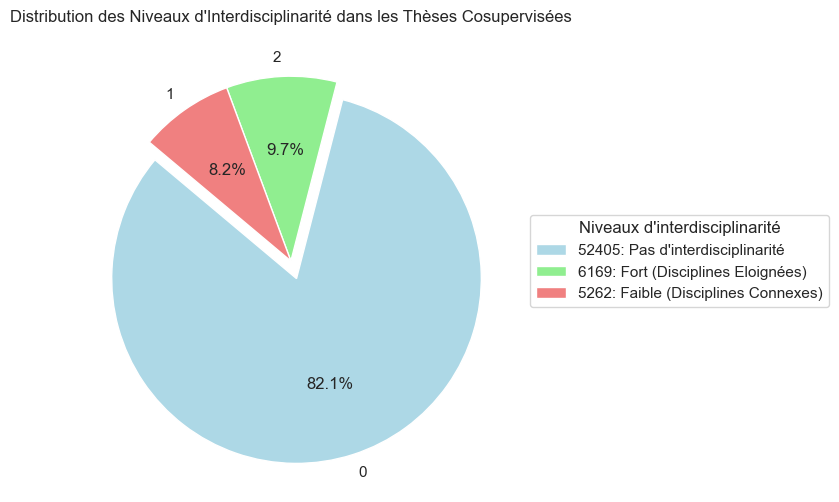

In [52]:
import matplotlib.pyplot as plt

# Assuming 'degre_interdisciplinarite' is the column you want to plot
degree_counts = these_cosupervisees_df['degre_interdisciplinarite'].value_counts()

# Map degree values to their corresponding labels
degree_labels = {
    0: "Pas d'interdisciplinarité",
    1: "Faible (Disciplines Connexes)",
    2: "Fort (Disciplines Eloignées)"
}

# Plotting a pie chart with style
plt.figure(figsize=(10, 6))
colors = ['lightblue', 'lightgreen', 'lightcoral']
explode = (0.1, 0, 0)  # Explode the first slice (0.1) for emphasis

plt.pie(degree_counts, labels=degree_counts.index, autopct='%1.1f%%', startangle=140, colors=colors, explode=explode)

# Add legend with custom labels
legend_labels = [f"{label}: {degree_labels[value]}" for value, label in degree_counts.items()]
plt.legend(legend_labels, loc='center left', bbox_to_anchor=(1.0, 0.5), title="Niveaux d'interdisciplinarité")

plt.title("Distribution des Niveaux d'Interdisciplinarité dans les Thèses Cosupervisées")
plt.savefig('distribInterdiFinal.png', transparent=False, bbox_inches='tight')

plt.show()


In [53]:
these_cosupervisees_df.loc[these_cosupervisees_df["Discipline_predite"].isin(categorie_1), "cat_matiere_these"] = "Sciences Naturelles"

these_cosupervisees_df.loc[these_cosupervisees_df["Discipline_predite"].isin(categorie_2), "cat_matiere_these"] = "Sciences Physiques et Techniques"

these_cosupervisees_df.loc[these_cosupervisees_df["Discipline_predite"].isin(categorie_3), "cat_matiere_these"] = "SHS"


In [54]:
these_cosupervisees_df.loc[these_cosupervisees_df["degre_interdisciplinarite"] == 0, "interdisciplinarite_bin"] = 0
these_cosupervisees_df.loc[(these_cosupervisees_df["degre_interdisciplinarite"] == 1)|(these_cosupervisees_df["degre_interdisciplinarite"] == 2), "interdisciplinarite_bin"] = 1

In [55]:
these_cosupervisees_df.loc[(these_cosupervisees_df["degre_interdisciplinarite"] == 0)|(these_cosupervisees_df["degre_interdisciplinarite"] == 1), "interdisciplinarite_forte_bin"] = 0
these_cosupervisees_df.loc[these_cosupervisees_df["degre_interdisciplinarite"] == 2, "interdisciplinarite_forte_bin"] = 1

In [57]:
value_counts_cosupervision = pd.read_csv("value_counts_cosupervisionv_2.csv")
value_counts_cosupervision['Year'] = pd.to_numeric(value_counts_cosupervision['Year'], errors='coerce')
value_counts_cosupervision['Year'].head()

0       NaN
1       NaN
2       NaN
3       NaN
4    2008.0
Name: Year, dtype: float64

In [58]:
these_cosupervisees_df_chart = these_cosupervisees_df[(these_cosupervisees_df['Year'] >= 1990) & these_cosupervisees_df['Year'] <= 2018]

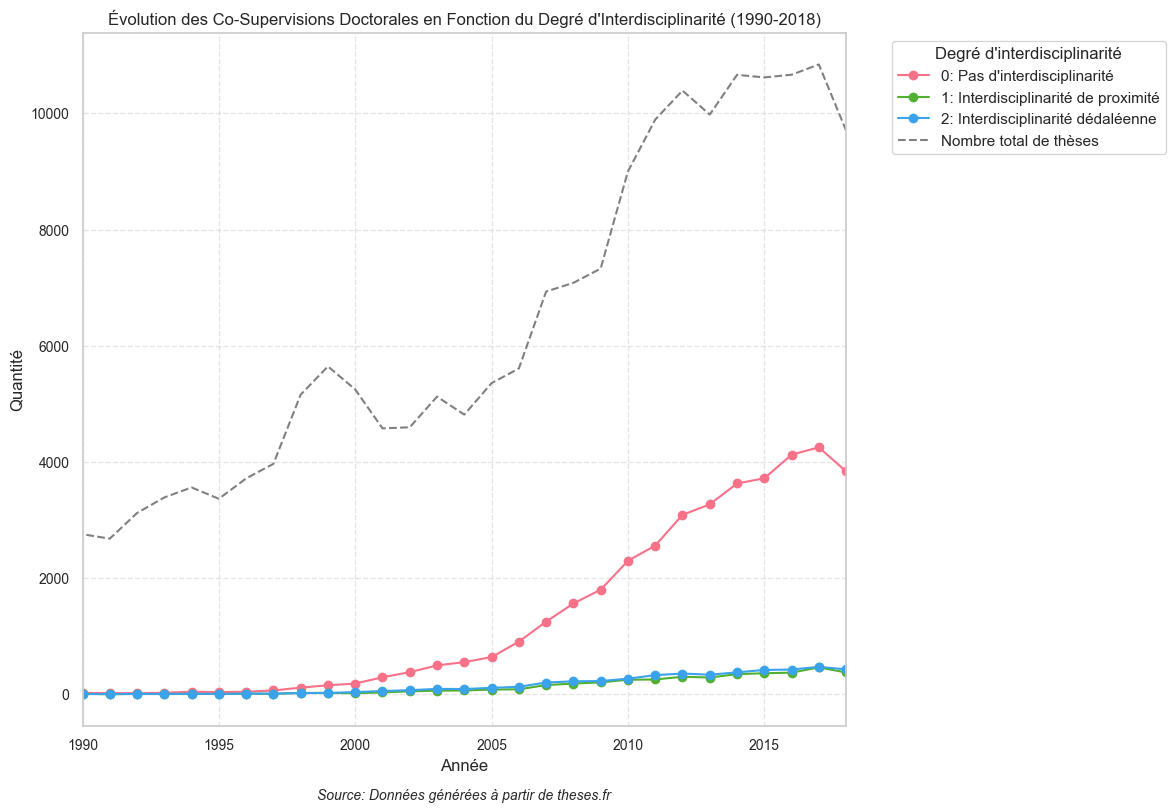

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns  # For color palettes

# Load the data for co-supervisions
these_cosupervisees_df_chart = these_cosupervisees_df.dropna(subset=['Year'])
value_counts_df = these_cosupervisees_df_chart.groupby(['Year', 'degre_interdisciplinarite']).size().unstack(fill_value=0)

# Mapping of degree values to custom labels
degree_labels = {
    0: "0: Pas d'interdisciplinarité",
    1: '1: Interdisciplinarité de proximité',
    2: '2: Interdisciplinarité dédaléenne'
}

# Load the data for total theses
value_counts_cosupervision = pd.read_csv("value_counts_cosupervisionv_2.csv").dropna(subset=['Year'])

# Create a line plot for total theses
total_theses_line = value_counts_cosupervision.groupby('Year').size()
total_theses_line.index = total_theses_line.index.astype(int)  # Ensure index is of integer type

# Create the stacked area plot
plt.figure(figsize=(12, 8))
colors = sns.color_palette("husl", n_colors=len(value_counts_df.columns))

for i, col in enumerate(value_counts_df.columns):
    plt.plot(value_counts_df.index, value_counts_df[col], label=degree_labels[col], color=colors[i], marker='o')

# Create a line plot for total theses
plt.plot(total_theses_line.index, total_theses_line.values, label='Nombre total de thèses', linestyle='--', color='gray')

# Other plot configurations (labels, title, etc.)
plt.xlabel('Année', fontsize=12)
plt.ylabel('Quantité', fontsize=12)
plt.title("Évolution des Co-Supervisions Doctorales en Fonction du Degré d'Interdisciplinarité (1990-2018)", fontsize=12)
plt.legend(title='Degré d\'interdisciplinarité', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(linestyle='--', alpha=0.5)
plt.tick_params(axis='both', labelsize=10)
plt.xlim(1990, 2018)
plt.tight_layout()

# Add a source
plt.annotate('Source: Données générées à partir de theses.fr',
             xy=(0.5, -0.1),
             ha='center',
             va='center',
             fontsize=10,
             xycoords='axes fraction',
             style='italic')

# Save or display the plot
plt.savefig('evoInterdiFinal.png')
plt.show()


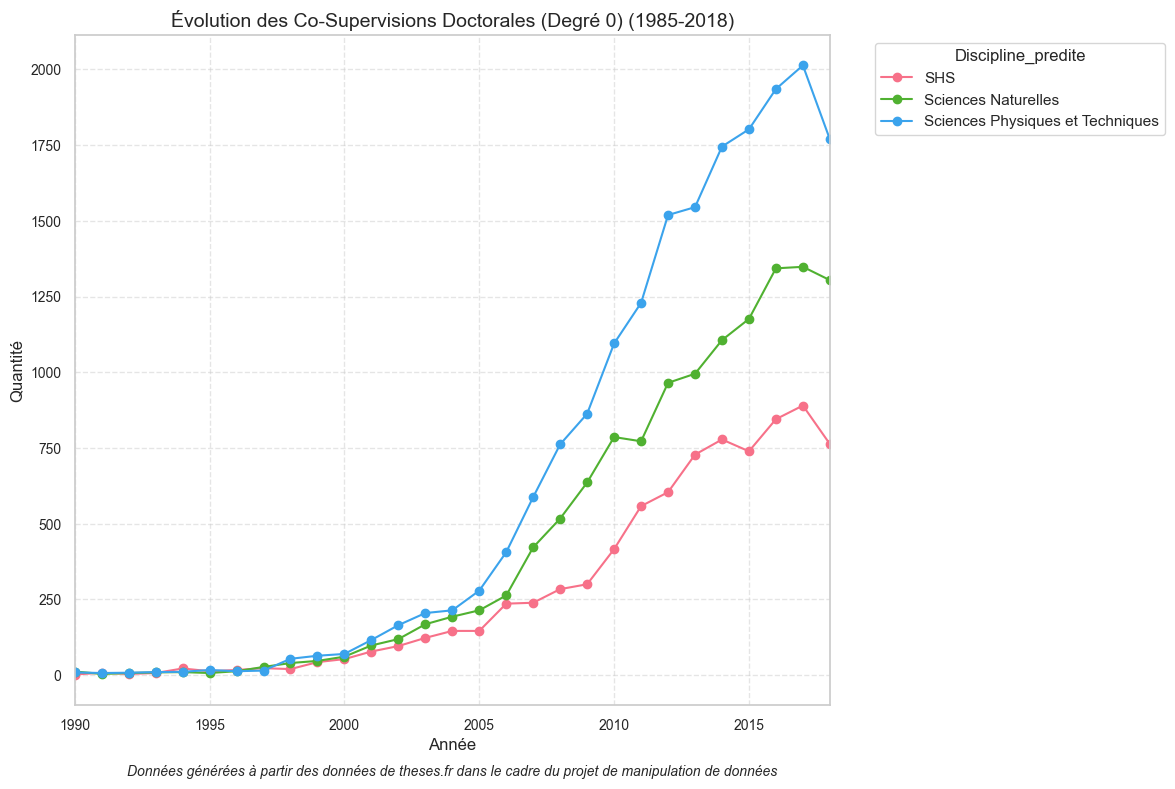

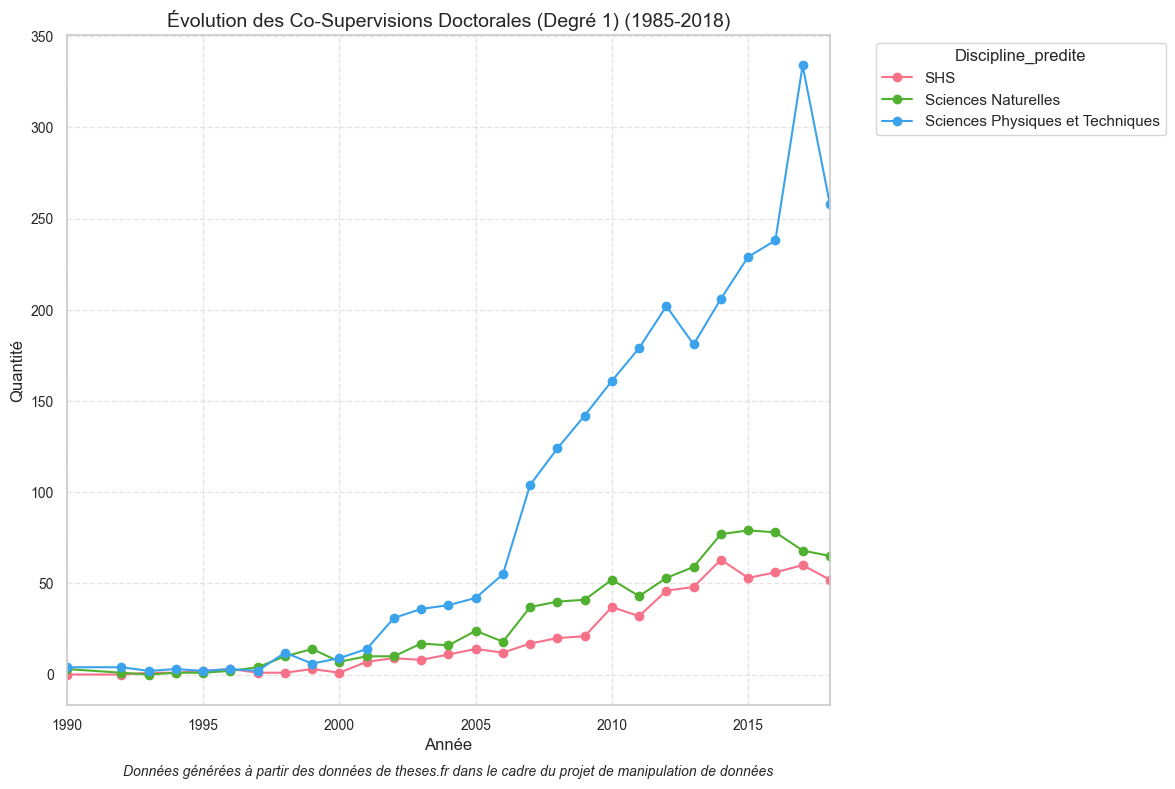

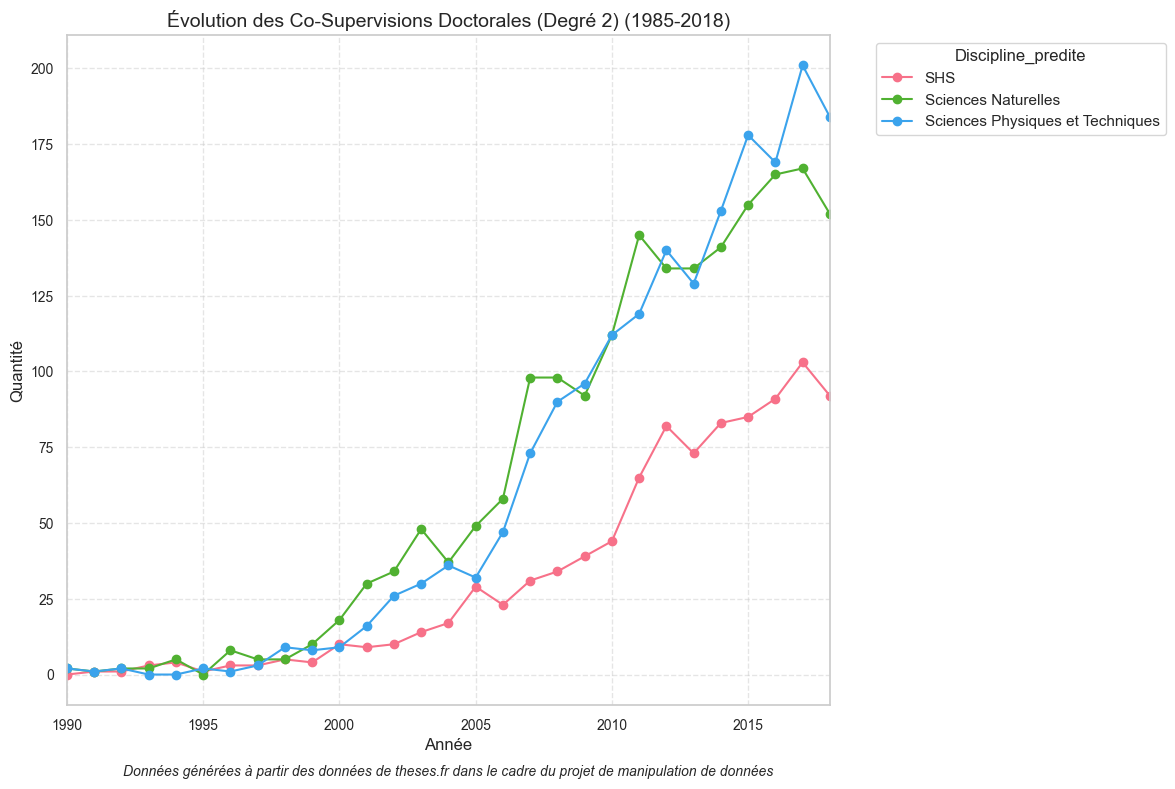

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# Liste des valeurs de degre_interdisciplinarite
degre_values = [0, 1, 2]

# Boucle sur chaque valeur de degre_interdisciplinarite
for degre_value in degre_values:
    # Filtrer les données en fonction des critères spécifiés
    these_cosupervisees_df_chart_2 = these_cosupervisees_df[(these_cosupervisees_df['Year'] <= 2018) & (these_cosupervisees_df['degre_interdisciplinarite'] == degre_value)]

    # Créer un tableau croisé des valeurs
    value_counts_df = these_cosupervisees_df_chart_2.groupby(['Year', 'cat_matiere_these']).size().unstack(fill_value=0)

    # Utilisation d'une palette de couleurs vibrantes
    colors = sns.color_palette("husl", n_colors=len(value_counts_df.columns))

    # Création du graphique en ligne
    plt.figure(figsize=(12, 8))

    # Tracer une ligne distincte pour chaque Discipline_predite
    for i, col in enumerate(value_counts_df.columns):
        plt.plot(value_counts_df.index, value_counts_df[col], label=col, color=colors[i], marker='o')

    plt.xlabel('Année', fontsize=12)
    plt.ylabel('Quantité', fontsize=12)
    plt.title(f"Évolution des Co-Supervisions Doctorales (Degré {degre_value}) (1985-2018)", fontsize=14)
    plt.legend(title='Discipline_predite', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(linestyle='--', alpha=0.5)  # Ajout d'une grille avec transparence
    plt.tick_params(axis='both', labelsize=10)

    # Limiter l'axe des x aux années 1985-2018
    plt.xlim(1990, 2018)

    # Ajouter une source rédigée de manière académique
    plt.annotate('Données générées à partir des données de theses.fr dans le cadre du projet de manipulation de données',
                 xy=(0.5, -0.1),
                 ha='center',
                 va='center',
                 fontsize=10,
                 xycoords='axes fraction',
                 style='italic')

    # Améliorer la disposition
    plt.tight_layout()

    # Sauvegarder ou afficher le graphique
    plt.savefig('evo.png', transparent=False, bbox_inches='tight')

    plt.show()


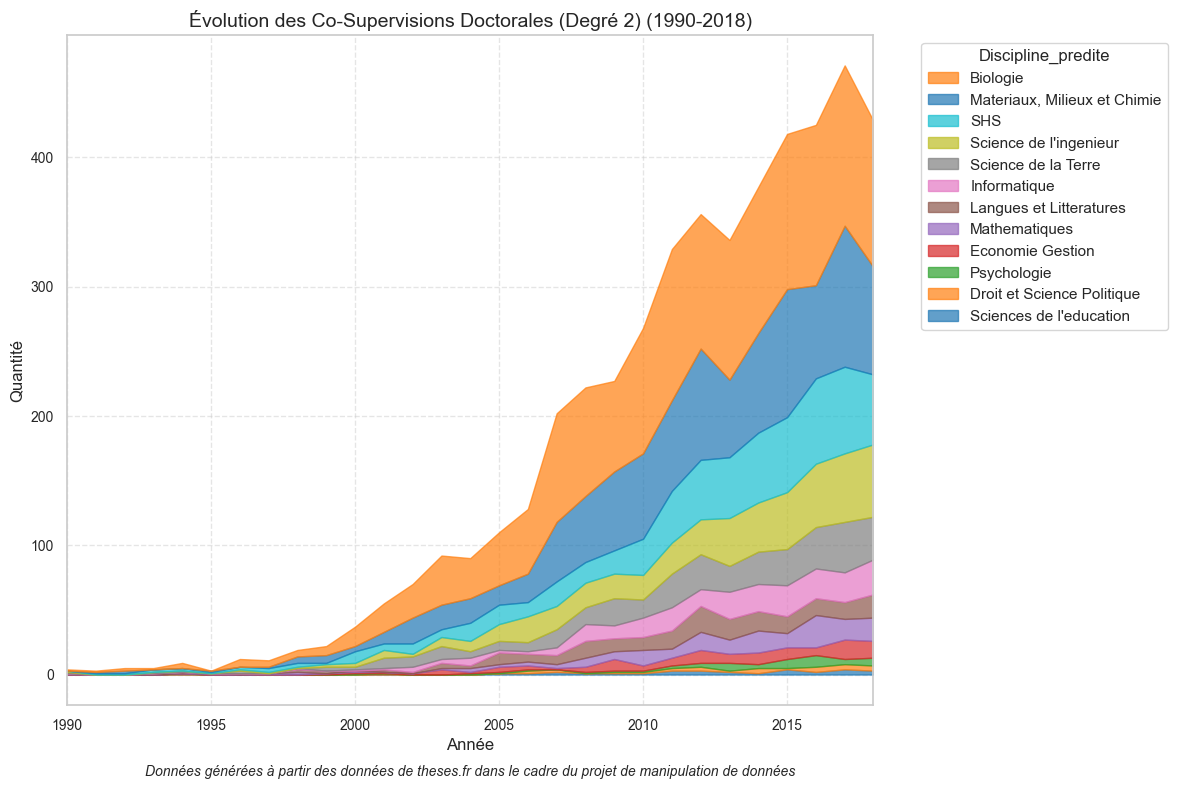

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

# Liste des valeurs de degre_interdisciplinarite
degre_values = [2]

# Boucle sur chaque valeur de degre_interdisciplinarite
for degre_value in degre_values:
    # Filtrer les données en fonction des critères spécifiés
    these_cosupervisees_df_chart_2 = these_cosupervisees_df[(these_cosupervisees_df['Year'] <= 2018) & (these_cosupervisees_df['degre_interdisciplinarite'] == degre_value)]

    # Créer un tableau croisé des valeurs
    value_counts_df = these_cosupervisees_df_chart_2.groupby(['Year', 'Discipline_predite']).size().unstack(fill_value=0)

    # Trier les disciplines par la proportion la plus basse
    sorted_disciplines = value_counts_df.sum(axis=0).sort_values().index
    value_counts_df = value_counts_df[sorted_disciplines]

    # Utilisation d'une palette de couleurs catégorielles avec 10 couleurs distinctes
    colors = sns.color_palette("tab10", n_colors=len(value_counts_df.columns))

    # Création du graphique en aires empilées
    plt.figure(figsize=(12, 8))

    # Tracer des aires empilées pour chaque Discipline_predite
    bottom = 0
    for i, col in enumerate(value_counts_df.columns):
        plt.fill_between(value_counts_df.index, bottom, bottom + value_counts_df[col], label=col, color=colors[i], alpha=0.7)
        bottom += value_counts_df[col]

    plt.xlabel('Année', fontsize=12)
    plt.ylabel('Quantité', fontsize=12)
    plt.title(f"Évolution des Co-Supervisions Doctorales (Degré {degre_value}) (1990-2018)", fontsize=14)

    # Trier la légende en ordre inverse pour correspondre à l'ordre des disciplines dans le graphique
    handles, labels = plt.gca().get_legend_handles_labels()
    handles = [handles[i] for i in reversed(range(len(handles)))]
    labels = [labels[i] for i in reversed(range(len(labels)))]

    plt.legend(handles, labels, title='Discipline_predite', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(linestyle='--', alpha=0.5)  # Ajout d'une grille avec transparence
    plt.tick_params(axis='both', labelsize=10)

    # Limiter l'axe des x aux années 1985-2018
    plt.xlim(1990, 2018)

    # Ajouter une source rédigée de manière académique
    plt.annotate('Données générées à partir des données de theses.fr dans le cadre du projet de manipulation de données',
                 xy=(0.5, -0.1),
                 ha='center',
                 va='center',
                 fontsize=10,
                 xycoords='axes fraction',
                 style='italic')

    # Améliorer la disposition
    plt.tight_layout()

    # Sauvegarder ou afficher le graphique
    plt.savefig('evofinaaa.png', transparent=False, bbox_inches='tight')

    plt.show()


C:\Users\nicol\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nicol\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nicol\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nicol\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

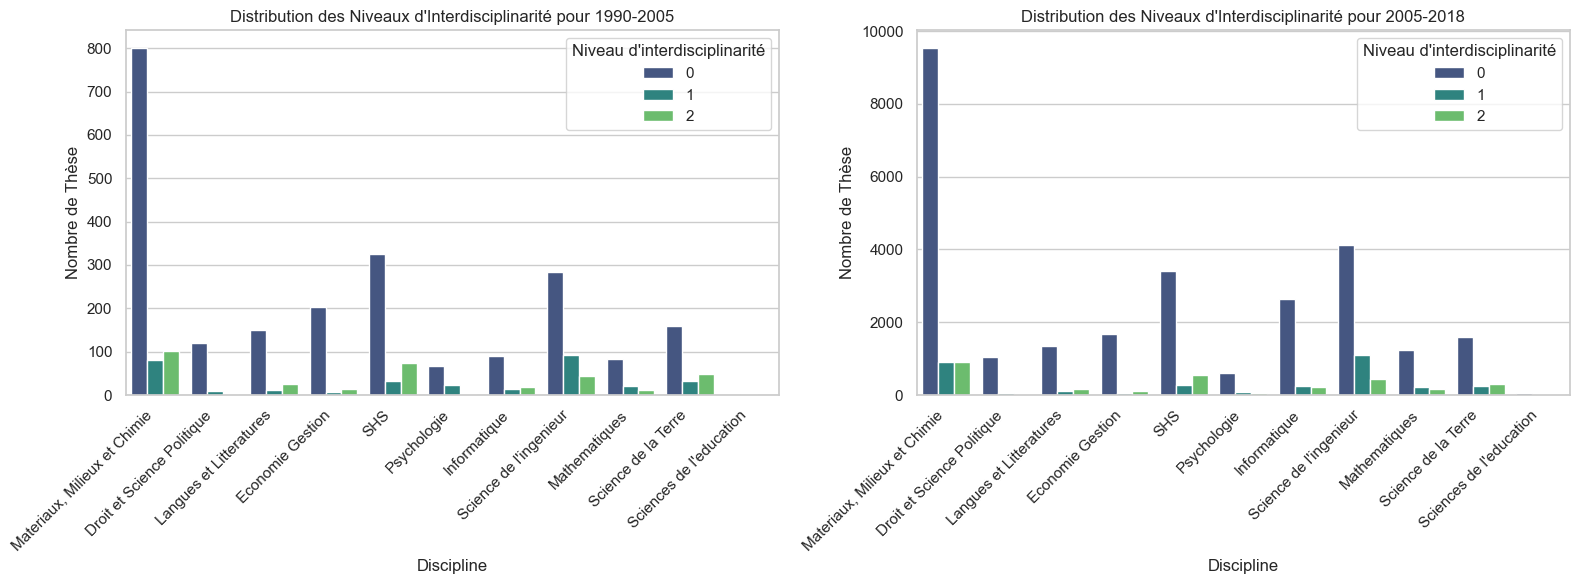

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Function to create side-by-side bar plots for two periods
def create_combined_bar_plots(df1, df2, period1, period2, discipline_order):
    plt.figure(figsize=(16, 6))
    
    # Plot for the first period
    plt.subplot(1, 2, 1)
    ax1 = sns.countplot(x='Discipline_predite', hue='degre_interdisciplinarite', data=df1, palette='viridis', order=discipline_order)
    plt.title(f"Distribution des Niveaux d'Interdisciplinarité pour {period1}")
    plt.xlabel('Discipline')
    plt.ylabel('Nombre de Thèse')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title="Niveau d'interdisciplinarité")
    
    # Add percentage above each bar per discipline for the first period
    for discipline in discipline_order:
        total_discipline = len(df1[df1['Discipline_predite'] == discipline])
        for p in ax1.patches:
            if p.get_label() == discipline:
                height = p.get_height()
                ax1.annotate(f'{height / total_discipline * 100:.2f}%', (p.get_x() + p.get_width() / 2., height),
                            ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
    # Plot for the second period
    plt.subplot(1, 2, 2)
    ax2 = sns.countplot(x='Discipline_predite', hue='degre_interdisciplinarite', data=df2, palette='viridis', order=discipline_order)
    plt.title(f"Distribution des Niveaux d'Interdisciplinarité pour {period2}")
    plt.xlabel('Discipline')
    plt.ylabel('Nombre de Thèse')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title="Niveau d'interdisciplinarité")
    
    # Add percentage above each bar per discipline for the second period
    for discipline in discipline_order:
        total_discipline = len(df2[df2['Discipline_predite'] == discipline])
        for p in ax2.patches:
            if p.get_label() == discipline:
                height = p.get_height()
                ax2.annotate(f'{height / total_discipline * 100:.2f}%', (p.get_x() + p.get_width() / 2., height),
                            ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
    # Adjust layout to prevent overlapping
    plt.tight_layout()
    
    plt.show()

# Remove NaN values and 'Biologie' from the discipline order
discipline_order = these_cosupervisees_df['Discipline_predite'].dropna().unique()
discipline_order = [discipline for discipline in discipline_order if discipline != 'Biologie']

# Filter data for 1998-2008 period
df_1998_2008 = these_cosupervisees_df[these_cosupervisees_df['Year'].between(1990, 2005)]

# Filter data for 2008-2018 period
df_2008_2018 = these_cosupervisees_df[these_cosupervisees_df['Year'].between(2005, 2018)]

# Create combined bar plots
create_combined_bar_plots(df_1998_2008, df_2008_2018, '1990-2005', '2005-2018', discipline_order)


C:\Users\nicol\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nicol\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nicol\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nicol\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

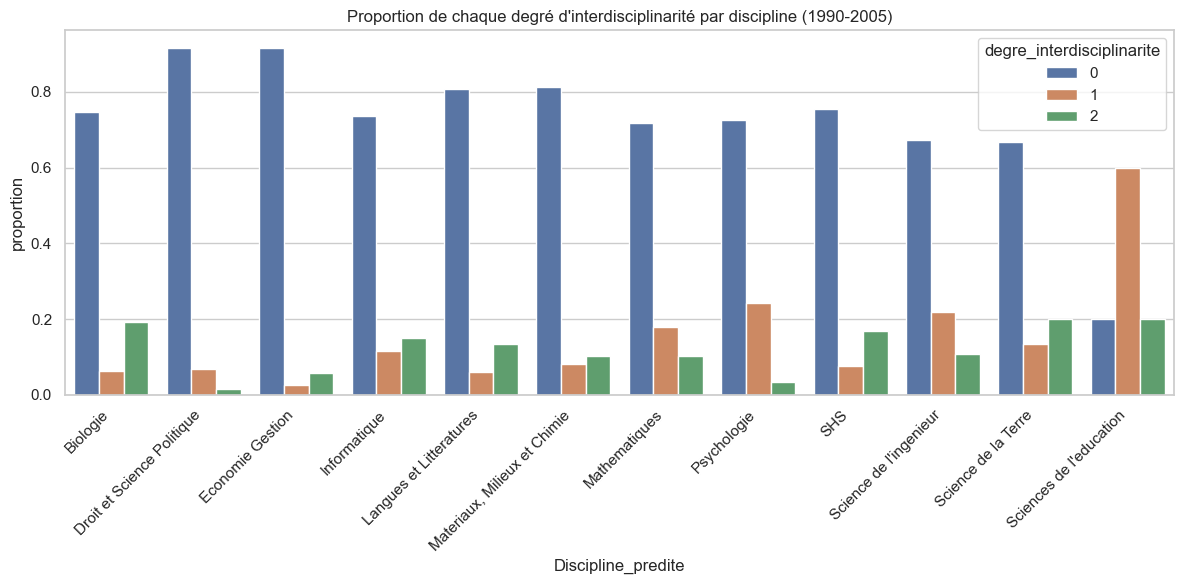

C:\Users\nicol\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nicol\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nicol\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nicol\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

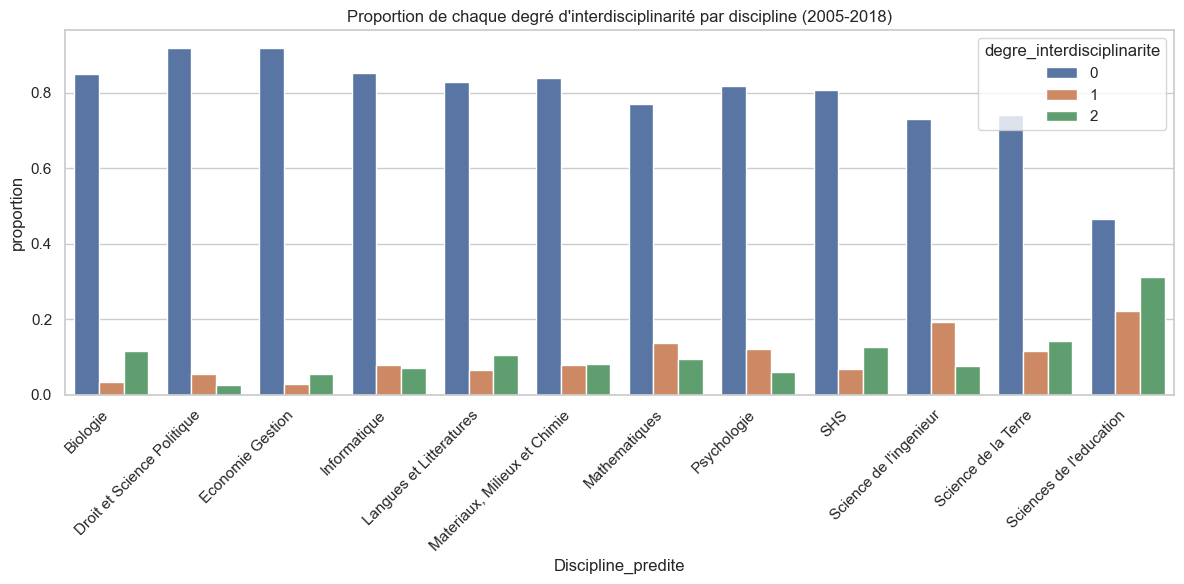

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the DataFrame is named theses_cosupervisee_df

# 1. Filter the DataFrame for each period
df_1990_2005 = these_cosupervisees_df[(these_cosupervisees_df['Year'] >= 1990) & (these_cosupervisees_df['Year'] <= 2005)]
df_2005_2018 = these_cosupervisees_df[(these_cosupervisees_df['Year'] > 2005) & (these_cosupervisees_df['Year'] <= 2018)]

# 2. Group by discipline and degree of interdisciplinarity for each period
grouped_1990_2005 = df_1990_2005.groupby(['Discipline_predite', 'degre_interdisciplinarite']).size().unstack().fillna(0)
grouped_2005_2018 = df_2005_2018.groupby(['Discipline_predite', 'degre_interdisciplinarite']).size().unstack().fillna(0)

# 3. Normalize to obtain the proportion
proportion_1990_2005 = grouped_1990_2005.div(grouped_1990_2005.sum(axis=1), axis=0)
proportion_2005_2018 = grouped_2005_2018.div(grouped_2005_2018.sum(axis=1), axis=0)

# 4. Reshape the DataFrame for seaborn barplot
proportion_1990_2005_reset = proportion_1990_2005.reset_index().melt(id_vars=['Discipline_predite'], var_name='degre_interdisciplinarite', value_name='proportion')
proportion_2005_2018_reset = proportion_2005_2018.reset_index().melt(id_vars=['Discipline_predite'], var_name='degre_interdisciplinarite', value_name='proportion')

# 5. Create bar plots for each period using seaborn
# Set style
sns.set(style="whitegrid")

# For the period 1990-2005
plt.figure(figsize=(12, 6))
sns.barplot(x='Discipline_predite', y='proportion', hue='degre_interdisciplinarite', data=proportion_1990_2005_reset)
plt.title('Proportion de chaque degré d\'interdisciplinarité par discipline (1990-2005)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.tight_layout()  # Ensure tight layout
plt.show()

# For the period 2005-2018
plt.figure(figsize=(12, 6))
sns.barplot(x='Discipline_predite', y='proportion', hue='degre_interdisciplinarite', data=proportion_2005_2018_reset)
plt.title('Proportion de chaque degré d\'interdisciplinarité par discipline (2005-2018)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.tight_layout()  # Ensure tight layout
plt.show()


C:\Users\nicol\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nicol\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nicol\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nicol\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

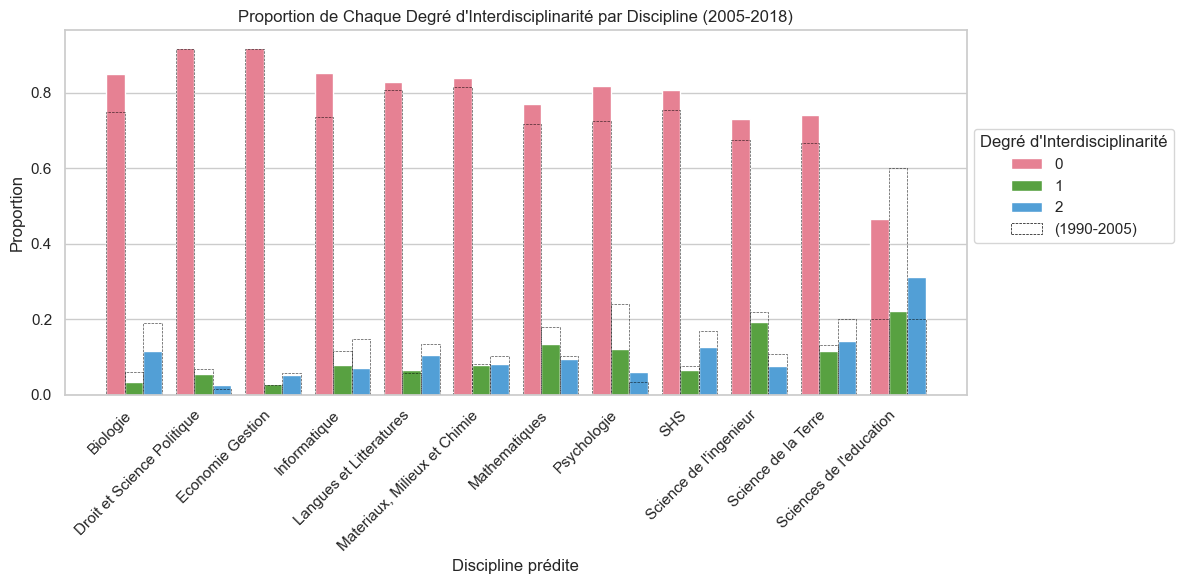

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches  # Add this line


# Suppose the DataFrame is named theses_cosupervisee_df

# 1. Filter the DataFrame for each period
df_1990_2005 = these_cosupervisees_df[(these_cosupervisees_df['Year'] >= 1990) & (these_cosupervisees_df['Year'] <= 2005)]
df_2005_2018 = these_cosupervisees_df[(these_cosupervisees_df['Year'] > 2005) & (these_cosupervisees_df['Year'] <= 2018)]

# 2. Group by discipline and degree of interdisciplinarity for each period
grouped_1990_2005 = df_1990_2005.groupby(['Discipline_predite', 'degre_interdisciplinarite']).size().unstack().fillna(0)
grouped_2005_2018 = df_2005_2018.groupby(['Discipline_predite', 'degre_interdisciplinarite']).size().unstack().fillna(0)

# 3. Normalize to obtain the proportion
proportion_1990_2005 = grouped_1990_2005.div(grouped_1990_2005.sum(axis=1), axis=0)
proportion_2005_2018 = grouped_2005_2018.div(grouped_2005_2018.sum(axis=1), axis=0)

# 4. Reshape the DataFrame for seaborn barplot
proportion_1990_2005_reset = proportion_1990_2005.reset_index().melt(id_vars=['Discipline_predite'], var_name='degre_interdisciplinarite', value_name='proportion')
proportion_2005_2018_reset = proportion_2005_2018.reset_index().melt(id_vars=['Discipline_predite'], var_name='degre_interdisciplinarite', value_name='proportion')

# 5. Create bar plot for the period 2005-2018 with transparent bars for previous values
plt.figure(figsize=(12, 6))

# Set a common color palette for both bars and transparent bars
color_palette = sns.color_palette("husl", n_colors=len(proportion_1990_2005_reset['degre_interdisciplinarite'].unique()))

# Bar plot for the period 2005-2018
ax = sns.barplot(x='Discipline_predite', y='proportion', hue='degre_interdisciplinarite', data=proportion_2005_2018_reset, palette=color_palette)

# Transparent bars for the period 1990-2005
for idx, bar in enumerate(ax.patches):
    line_data = proportion_1990_2005_reset.iloc[idx]
    ax.bar(bar.get_x() + bar.get_width() / 2, line_data['proportion'], width=bar.get_width(), color='none', edgecolor='black', linewidth=0.5, linestyle='--', alpha=0.7)

# Improve legend clarity
legend_title = 'Degré d\'Interdisciplinarité'
ax.legend(title=legend_title, bbox_to_anchor=(1, 1), loc='upper left', ncol=1)

# Add the patch at the end of the existing legend
legend_patch = mpatches.Patch(facecolor='none', edgecolor='black', linewidth=0.5, linestyle='--', label='Valeurs de 1990-2005')

# Get the existing legend handles and labels
handles, labels = ax.get_legend_handles_labels()

# Add the new legend patch to the handles and labels
handles.append(legend_patch)
labels.append('(1990-2005)')

# Create a new legend with the modified handles and labels
ax.legend(handles=handles, labels=labels, title=legend_title, bbox_to_anchor=(1, 0.75), loc='upper left', ncol=1)

plt.title('Proportion de Chaque Degré d\'Interdisciplinarité par Discipline (2005-2018)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.xlabel('Discipline prédite')
plt.ylabel('Proportion')
plt.tight_layout()  # Ensure tight layout

plt.savefig('proporFinal.png', transparent=False, bbox_inches='tight')


plt.show()


In [68]:
import statsmodels.api as sm
import patsy

formula = 'interdisciplinarite_forte_bin ~ C(Discipline_predite)'

y, X = patsy.dmatrices(formula, these_cosupervisees_df, return_type='dataframe')

# Créer un modèle de régression logistique
model_1 = sm.Logit(y, X)

# Ajuster le modèle
results = model_1.fit()

# Obtenir les résumés du modèle, y compris les odds ratios
summary = results.summary()

# Afficher le résumé
print(summary)

Optimization terminated successfully.
         Current function value: 0.313008
         Iterations 8
                                 Logit Regression Results                                
Dep. Variable:     interdisciplinarite_forte_bin   No. Observations:                63833
Model:                                     Logit   Df Residuals:                    63821
Method:                                      MLE   Df Model:                           11
Date:                           Mon, 25 Dec 2023   Pseudo R-squ.:                 0.01459
Time:                                   20:29:53   Log-Likelihood:                -19980.
converged:                                  True   LL-Null:                       -20276.
Covariance Type:                       nonrobust   LLR p-value:                7.930e-120
                                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------

In [81]:
import statsmodels.api as sm
import patsy

# Supposons que "interdisciplinarite_forte_bin" est votre variable dépendante binaire
# Utilisez Treatment pour spécifier la catégorie de référence
formula = 'interdisciplinarite_forte_bin ~ C(Discipline_predite)'

# Utiliser patsy pour créer les matrices de conception
y, X = patsy.dmatrices(formula, data=these_cosupervisees_df, return_type='dataframe')

# Créer un modèle de régression logistique
model = sm.Logit(y, X)

# Ajuster le modèle
results = model.fit()

# Obtenir les résumés du modèle, y compris les odds ratios
summary = results.summary()

# Afficher le résumé
print(summary)

# Exponentier les coefficients pour obtenir les odds ratios
odds_ratios = np.exp(results.params)
print("\nOdds Ratios:")
print(odds_ratios)


Optimization terminated successfully.
         Current function value: 0.313008
         Iterations 8
                                 Logit Regression Results                                
Dep. Variable:     interdisciplinarite_forte_bin   No. Observations:                63833
Model:                                     Logit   Df Residuals:                    63821
Method:                                      MLE   Df Model:                           11
Date:                           Mon, 25 Dec 2023   Pseudo R-squ.:                 0.01459
Time:                                   21:42:51   Log-Likelihood:                -19980.
converged:                                  True   LL-Null:                       -20276.
Covariance Type:                       nonrobust   LLR p-value:                7.930e-120
                                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------

In [77]:
# Supposons que "results" est votre objet de résultats du modèle
conf_intervals = results.conf_int(alpha=0.05)  # alpha=0.05 correspond à un intervalle de confiance à 95%

# Afficher les intervalles de confiance pour chaque coefficient
print(conf_intervals)


                                                                                                       0  \
Intercept                                                                                      -3.911335   
C(Discipline_predite, Treatment("Droit et Science Politique"))[T.Biologie]                      1.408913   
C(Discipline_predite, Treatment("Droit et Science Politique"))[T.Economie Gestion]              0.442171   
C(Discipline_predite, Treatment("Droit et Science Politique"))[T.Informatique]                  0.830231   
C(Discipline_predite, Treatment("Droit et Science Politique"))[T.Langues et Litteratures]       1.173659   
C(Discipline_predite, Treatment("Droit et Science Politique"))[T.Materiaux, Milieux et Chimie]  0.987502   
C(Discipline_predite, Treatment("Droit et Science Politique"))[T.Mathematiques]                 1.109315   
C(Discipline_predite, Treatment("Droit et Science Politique"))[T.Psychologie]                   0.650025   
C(Discipline_predite, Treatm

In [65]:
# Extraire les coefficients et les intervalles de confiance
coef = results.params
conf_int = results.conf_int()

# Calculer les odds ratios
odds_ratios = pd.DataFrame({'Odds Ratio': np.exp(coef), 'IC Inférieur': np.exp(conf_int[0]), 'IC Supérieur': np.exp(conf_int[1])})

# Afficher la table des odds ratios
print(odds_ratios)

NameError: name 'results' is not defined

In [ ]:
import statsmodels.api as sm
import patsy
import numpy as np

formula = 'interdisciplinarite_forte_bin ~ C(Discipline_predite)'

# Utiliser patsy pour créer les matrices de conception
y, X = patsy.dmatrices(formula, these_cosupervisees_df, return_type='dataframe')

# Créer un modèle de régression logistique
model = sm.Logit(y, X)

# Ajuster le modèle
results = model.fit()

# Obtenir les résumés du modèle, y compris les odds ratios
summary = results.summary()

# Afficher le résumé
print(summary)

# Exponentier les coefficients pour obtenir les odds ratios
odds_ratios = np.exp(results.params)
print("\nOdds Ratios:")
print(odds_ratios)

# Enregistrez les odds ratios dans une variable pour référence ultérieure dans LaTeX
with open('odds_ratios.txt', 'w') as file:
    file.write(odds_ratios.to_latex())

# Utilisez \label pour attribuer un label à votre tableau dans LaTeX
print("\nLaTeX Reference:")
print("\\label{tab:odds_ratios}")


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import patsy

# Specify the logistic regression model with categorical variable (Discipline_predite)
formula = 'interdisciplinarite_forte_bin ~ C(Discipline_predite)'

# Create design matrices using patsy
y, X = patsy.dmatrices(formula, these_cosupervisees_df, return_type='dataframe')

# Create a logistic regression model
model = sm.Logit(y, X)

# Fit the model
results = model.fit()

# Extract coefficients and confidence intervals
coef = results.params.drop('Intercept')
conf_int = results.conf_int().drop('Intercept', axis=0)

# Create a DataFrame for Seaborn
import pandas as pd
data = pd.DataFrame({
    'Variable': coef.index,
    'Odds Ratio': np.exp(coef),
    'Lower CI': np.exp(conf_int[0]),
    'Upper CI': np.exp(conf_int[1])
})

# Create a DataFrame for reference values
#reference_data = pd.DataFrame({
#    'Variable': X.columns[1:],  # Exclude intercept
#    'Odds Ratio': 1.0,
#    'Lower CI': 1.0,
#    'Upper CI': 1.0
#})

# Concatenate DataFrames
#data = pd.concat([data, reference_data])

# Group by category "Discipline_predite"
grouped_data = data.groupby(['Variable'])

# Scatter plot with error bars using Seaborn (horizontal) for each category
plt.figure(figsize=(8, 5))
for name, group in grouped_data:
    sns.scatterplot(x='Odds Ratio', y='Variable', data=group, label=name)
    plt.errorbar(group['Odds Ratio'], group['Variable'], xerr=[group['Odds Ratio'] - group['Lower CI'], group['Upper CI'] - group['Odds Ratio']], fmt='o', capsize=5)

# Set legend to the right
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.title('Forest Plot of Odds Ratios with Confidence Intervals (Grouped by Discipline_predite)')
plt.xlabel('Odds Ratio')
plt.ylabel('Variable')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import patsy
import pandas as pd

# Specify the logistic regression model with a categorical variable (Discipline_predite)
formula = 'interdisciplinarite_forte_bin ~ C(Discipline_predite)'

# Create design matrices using patsy
y, X = patsy.dmatrices(formula, these_cosupervisees_df, return_type='dataframe')

# Create a logistic regression model
model = sm.Logit(y, X)

# Fit the model
results = model.fit()

# Extract coefficients and confidence intervals
coef = results.params.drop('Intercept')
conf_int = results.conf_int().drop('Intercept', axis=0)

# Create a DataFrame for Seaborn
data = pd.DataFrame({
    'Variable': coef.index,
    'Odds Ratio': np.exp(coef),
    'Lower CI': np.exp(conf_int[0]),
    'Upper CI': np.exp(conf_int[1])
})

# Create a DataFrame for reference values
reference_data = pd.DataFrame({
    'Variable': X.columns[1:],  # Exclude intercept
    'Odds Ratio': 1.0,
    'Lower CI': 1.0,
    'Upper CI': 1.0
})

# Concatenate DataFrames
data = pd.concat([data, reference_data])

# Group by category "Discipline_predite"
grouped_data = data.groupby(['Variable'])

# Scatter plot with error bars using Seaborn (horizontal) for each category
plt.figure(figsize=(8, 5))
for name, group in grouped_data:
    sns.scatterplot(x='Odds Ratio', y='Variable', data=group, label=name)
    plt.errorbar(group['Odds Ratio'], group['Variable'], xerr=[group['Odds Ratio'] - group['Lower CI'], group['Upper CI'] - group['Odds Ratio']], fmt='o', capsize=5)

# Set legend to the right
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.title('Forest Plot of Odds Ratios with Confidence Intervals (Grouped by Discipline_predite)')
plt.xlabel('Odds Ratio')
plt.ylabel('Variable')
plt.show()
